# Customer Churn Prediction - Exploratory Data Analysis

**Objective:** Understand the factors that drive customer churn and identify patterns for predictive modeling.

**Dataset:** IBM Telco Customer Churn  
**Author:** Anthony Nguyen  
**Date:** 15/11/2025

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set styles
# plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print('✅ Libraries loaded successfully')

✅ Libraries loaded successfully


In [2]:
try:
    df = pd.read_csv('../data/01-raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print('✅ Data loaded successfully!\nWith shape:', df.shape)
except FileNotFoundError:
    print('❌ Data file not found. Please check the file path.')
except Exception as e:
    print(f'❌ Error loading data: {e}')


✅ Data loaded successfully!
With shape: (7043, 21)


## 2. Data Overview

In [3]:
# Basic info
print('📊 Dataset Summary')
print('=' * 50)
print(f"Total Customers: {len(df):,}")
print(f"Features: {len(df.columns) - 1}")
print(f"\nChurn Distribution:")
print(df['Churn'].value_counts(normalize=True).round(3) * 100)

📊 Dataset Summary
Total Customers: 7,043
Features: 20

Churn Distribution:
Churn
No    73.50
Yes   26.50
Name: proportion, dtype: float64


In [4]:
print('📋 Basic dataset info displayed')
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-null': df.notnull().sum(),
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

info_df

📋 Basic dataset info displayed


,Data Type,Non-null,Missing Values,Unique Values
customerID,object,7043,0,7043
gender,object,7043,0,2
SeniorCitizen,int64,7043,0,2
Partner,object,7043,0,2
Dependents,object,7043,0,2
tenure,int64,7043,0,73
PhoneService,object,7043,0,2
MultipleLines,object,7043,0,3
InternetService,object,7043,0,3
OnlineSecurity,object,7043,0,3


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Missing TotalCharges: {df['TotalCharges'].isna().sum()}")
print('For NaN in TotalCharges, these are new customers with tenure = 0')
df[df['TotalCharges'].isna()][['tenure', 'MonthlyCharges', 'TotalCharges']]

Missing TotalCharges: 11
For NaN in TotalCharges, these are new customers with tenure = 0


,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


## 3. Target Variable Analysis

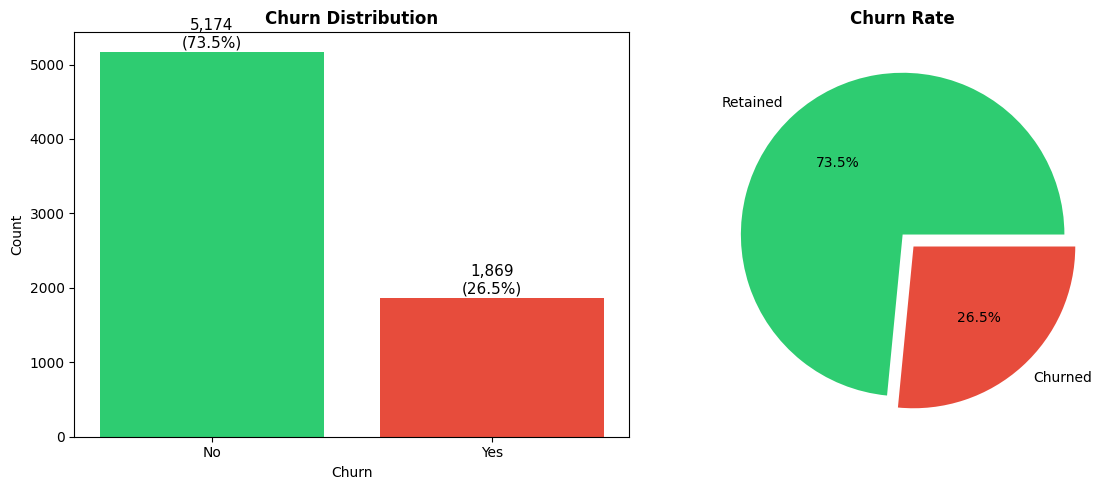


💡 INSIGHT: Class imbalance present - 26.5% churn rate
   Will need stratified sampling and appropriate evaluation metrics.


In [6]:
# Churn distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
churn_counts = df['Churn'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(churn_counts.index, churn_counts.values, color=colors)
axes[0].set_title('Churn Distribution', fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

for i, (idx, val) in enumerate(churn_counts.items()):
    axes[0].text(i, val + 50, f'{val:,}\n({val/len(df)*100:.1f}%)', 
                 ha='center', fontsize=11)

# Pie chart
axes[1].pie(churn_counts.values, labels=['Retained', 'Churned'], 
            autopct='%1.1f%%', colors=colors, explode=[0, 0.1])
axes[1].set_title('Churn Rate', fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/img/churn_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n💡 INSIGHT: Class imbalance present - {churn_counts['Yes']/len(df)*100:.1f}% churn rate")
print("   Will need stratified sampling and appropriate evaluation metrics.")

## 4. Feature Analysis - Demographics

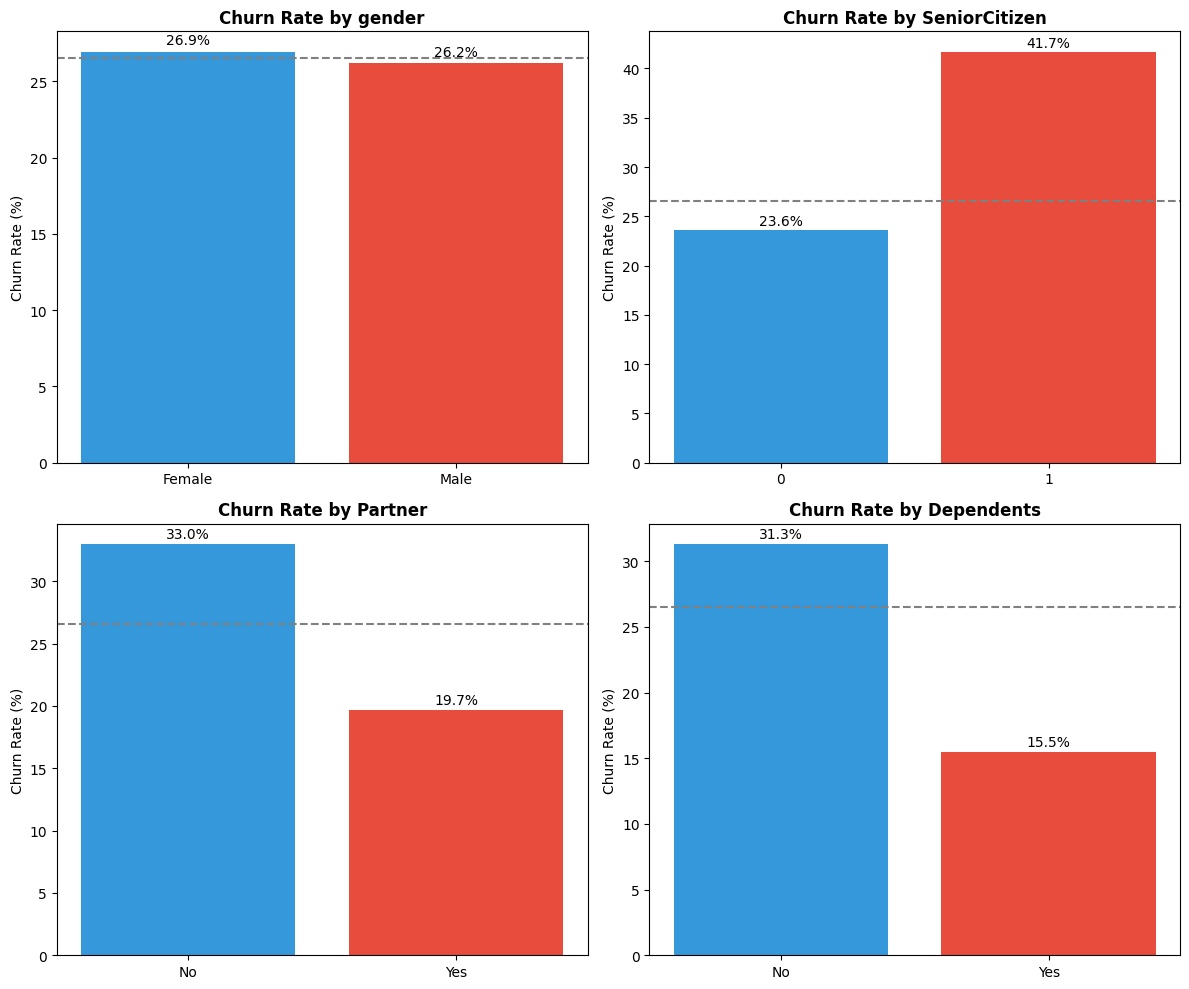


💡 INSIGHTS:
   - Gender has minimal impact on churn
   - Senior citizens churn ~40% more
   - Customers with partners/dependents churn less (more stable)


In [7]:
# Demographics vs Churn
demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feat in enumerate(demo_features):
    churn_rate = df.groupby(feat)['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
    
    bars = axes[i].bar(churn_rate.index.astype(str), churn_rate.values, 
                       color=['#3498db', '#e74c3c'][:len(churn_rate)])
    axes[i].set_title(f'Churn Rate by {feat}', fontweight='bold')
    axes[i].set_ylabel('Churn Rate (%)')
    axes[i].axhline(y=df['Churn'].apply(lambda x: x=='Yes').mean()*100, 
                    color='gray', linestyle='--', label='Overall')
    
    for bar in bars:
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                     f'{bar.get_height():.1f}%', ha='center')

plt.tight_layout()
plt.savefig('../docs/img/demographics_churn.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 INSIGHTS:")
print("   - Gender has minimal impact on churn")
print("   - Senior citizens churn ~40% more")
print("   - Customers with partners/dependents churn less (more stable)")

In [8]:
df['Churn'].apply(lambda x: x=='Yes').mean()

np.float64(0.2653698707936959)

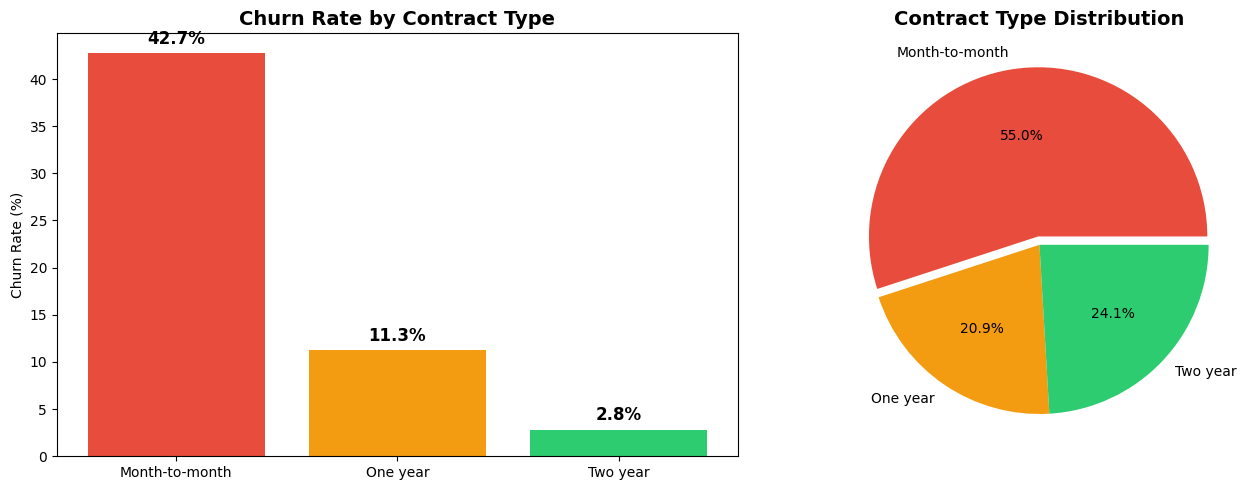


🔥 KEY INSIGHT: Month-to-month customers churn 15.1x more than 2-year contracts!
   - Month-to-month: 42.7% churn
   - Two year: 2.8% churn


In [9]:
# Contract Type - THE MOST IMPORTANT FEATURE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn rate by contract
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
contract_order = ['Month-to-month', 'One year', 'Two year']
contract_churn = contract_churn.reindex(contract_order)

colors = ['#e74c3c', '#f39c12', '#2ecc71']
bars = axes[0].bar(contract_churn.index, contract_churn.values, color=colors)
axes[0].set_title('Churn Rate by Contract Type', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Churn Rate (%)')

for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{bar.get_height():.1f}%', ha='center', fontsize=12, fontweight='bold')

# Distribution of contracts
contract_dist = df['Contract'].value_counts().reindex(contract_order)
axes[1].pie(contract_dist.values, labels=contract_dist.index, autopct='%1.1f%%', 
            colors=colors, explode=[0.05, 0, 0])
axes[1].set_title('Contract Type Distribution', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.savefig('../docs/img/contract_churn.png', dpi=150, bbox_inches='tight')
plt.show()

mtm_churn = contract_churn['Month-to-month']
twoyear_churn = contract_churn['Two year']
print(f"\n🔥 KEY INSIGHT: Month-to-month customers churn {mtm_churn/twoyear_churn:.1f}x more than 2-year contracts!")
print(f"   - Month-to-month: {mtm_churn:.1f}% churn")
print(f"   - Two year: {twoyear_churn:.1f}% churn")

C:\Users\krazy\AppData\Local\Temp\ipykernel_20408\3560296403.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_bucket')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)


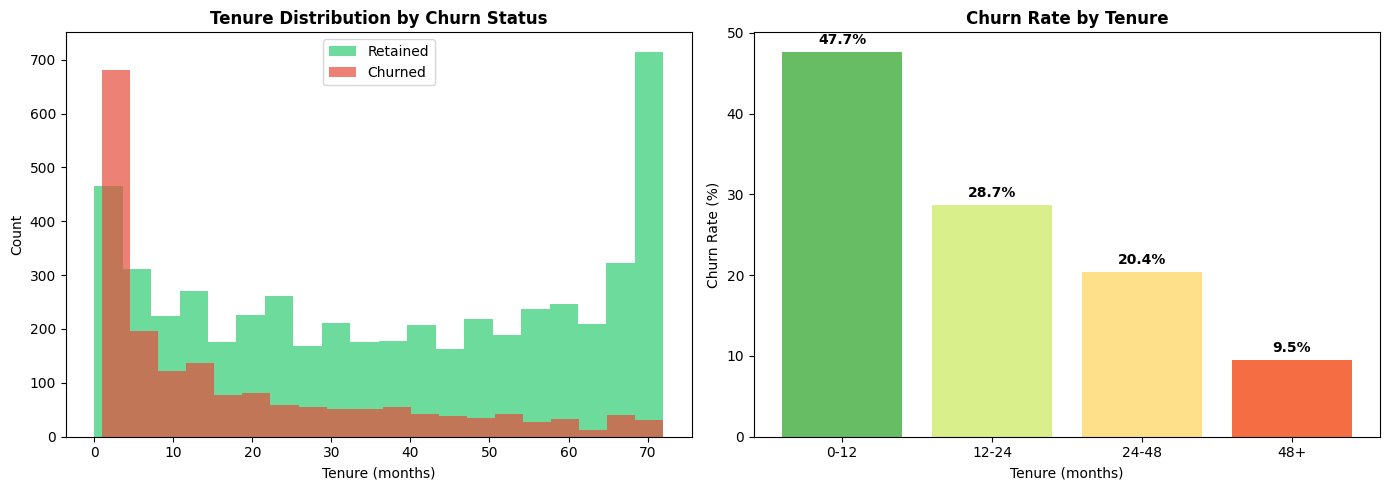


💡 INSIGHT: New customers (0-12 months) have 47.7% churn rate
   Long-term customers (48+ months) only 9.5% churn rate
   → Early engagement is critical for retention!


In [10]:
# Tenure Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tenure distribution by churn
axes[0].hist(df[df['Churn']=='No']['tenure'], bins=20, alpha=0.7, label='Retained', color='#2ecc71')
axes[0].hist(df[df['Churn']=='Yes']['tenure'], bins=20, alpha=0.7, label='Churned', color='#e74c3c')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Count')
axes[0].set_title('Tenure Distribution by Churn Status', fontweight='bold')
axes[0].legend()

# Churn rate by tenure bucket
df['tenure_bucket'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], 
                              labels=['0-12', '12-24', '24-48', '48+'])
tenure_churn = df.groupby('tenure_bucket')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)

colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, 4))
bars = axes[1].bar(tenure_churn.index.astype(str), tenure_churn.values, color=colors)
axes[1].set_xlabel('Tenure (months)')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_title('Churn Rate by Tenure', fontweight='bold')

for bar in bars:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{bar.get_height():.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/img/tenure_churn.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n💡 INSIGHT: New customers (0-12 months) have {tenure_churn['0-12']:.1f}% churn rate")
print(f"   Long-term customers (48+ months) only {tenure_churn['48+']:.1f}% churn rate")
print("   → Early engagement is critical for retention!")

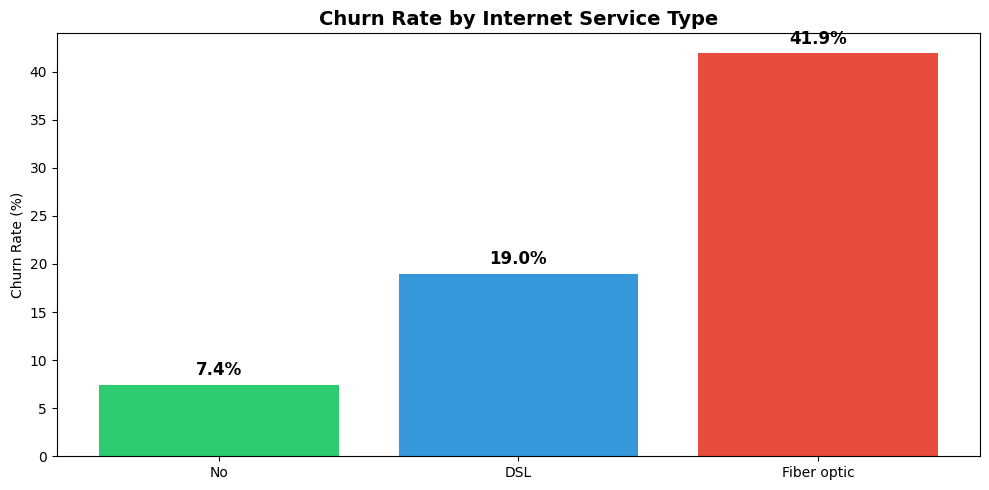


⚠️ INSIGHT: Fiber optic customers churn at 41.9%!
   Possible reasons:
   - Higher expectations not met?
   - More tech-savvy, easier to switch?
   - Service quality issues?


In [11]:
# Internet Service Type
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#2ecc71', '#3498db', '#e74c3c']
order = ['No', 'DSL', 'Fiber optic']
internet_churn = internet_churn.reindex(order)

bars = ax.bar(internet_churn.index, internet_churn.values, color=colors)
ax.set_title('Churn Rate by Internet Service Type', fontweight='bold', fontsize=14)
ax.set_ylabel('Churn Rate (%)')

for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{bar.get_height():.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/img/internet_churn.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n⚠️ INSIGHT: Fiber optic customers churn at {internet_churn['Fiber optic']:.1f}%!")
print("   Possible reasons:")
print("   - Higher expectations not met?")
print("   - More tech-savvy, easier to switch?")
print("   - Service quality issues?")

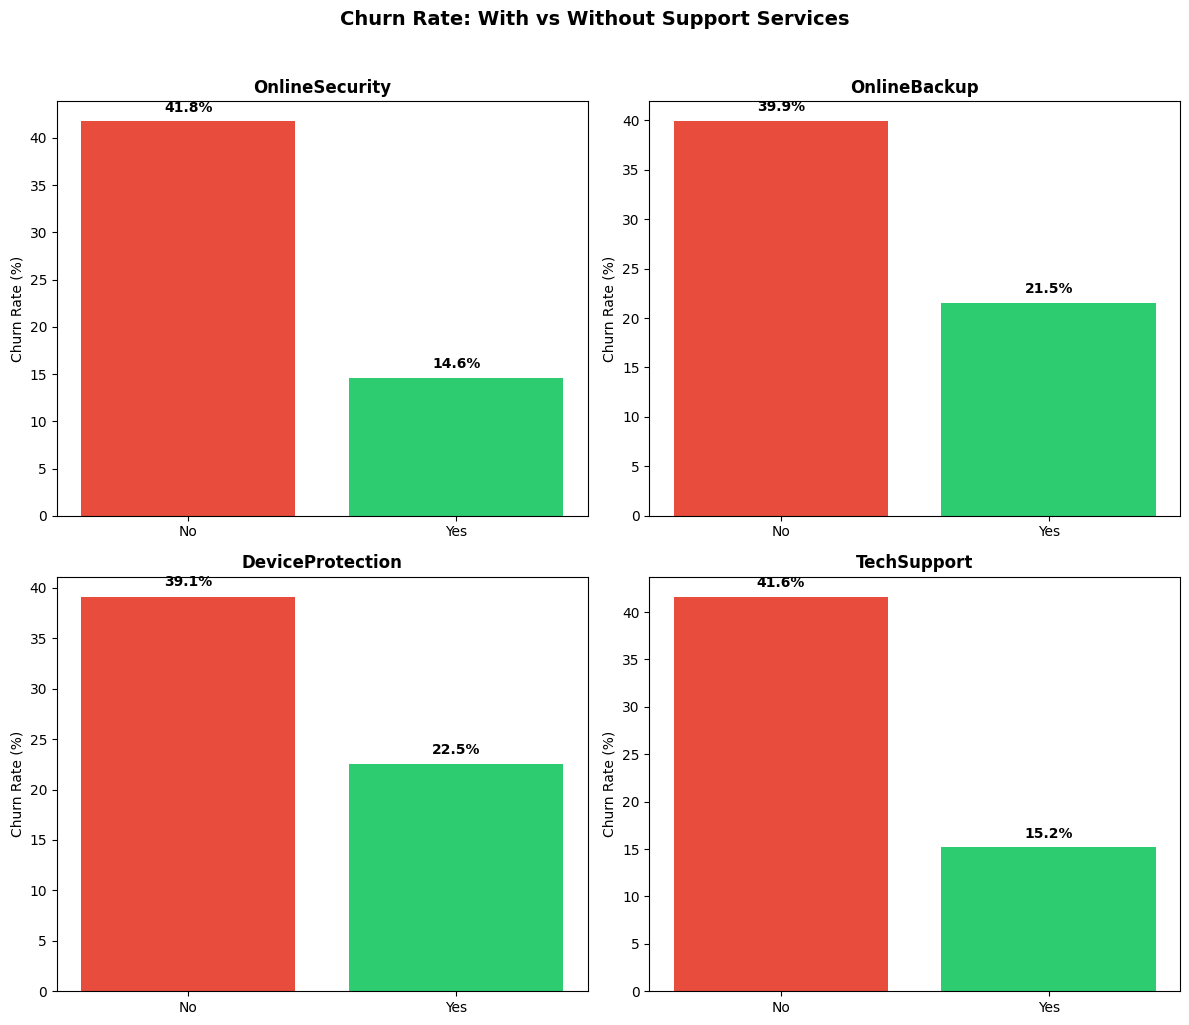


💡 INSIGHT: Customers WITHOUT support services churn 2x more!
   → Bundle support services as retention strategy


In [12]:
# Support Services
support_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, service in enumerate(support_services):
    # Only compare Yes vs No (not 'No internet service')
    service_data = df[df[service].isin(['Yes', 'No'])]
    churn_rate = service_data.groupby(service)['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
    
    colors = ['#e74c3c', '#2ecc71']
    bars = axes[i].bar(churn_rate.index, churn_rate.values, color=colors)
    axes[i].set_title(f'{service}', fontweight='bold')
    axes[i].set_ylabel('Churn Rate (%)')
    
    for bar in bars:
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                     f'{bar.get_height():.1f}%', ha='center', fontweight='bold')

plt.suptitle('Churn Rate: With vs Without Support Services', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../docs/img/support_services_churn.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 INSIGHT: Customers WITHOUT support services churn 2x more!")
print("   → Bundle support services as retention strategy")

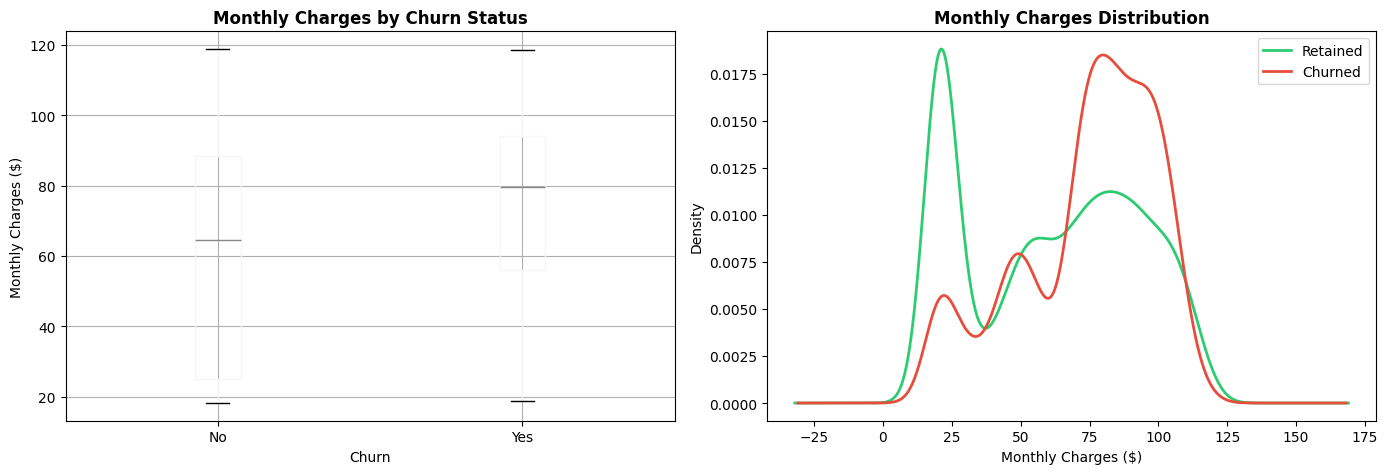


💡 INSIGHT: Churned customers pay more on average
   - Churned: $74.44/month
   - Retained: $61.27/month
   → Higher charges may lead to value perception issues


In [13]:
# Monthly charges distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot by churn
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[0])
axes[0].set_title('Monthly Charges by Churn Status', fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Monthly Charges ($)')
plt.suptitle('')  # Remove automatic title

# KDE plot
for churn_val, color, label in [('No', '#2ecc71', 'Retained'), ('Yes', '#e74c3c', 'Churned')]:
    df[df['Churn']==churn_val]['MonthlyCharges'].plot.kde(ax=axes[1], color=color, label=label, linewidth=2)
axes[1].set_title('Monthly Charges Distribution', fontweight='bold')
axes[1].set_xlabel('Monthly Charges ($)')
axes[1].legend()

plt.tight_layout()
plt.savefig('../docs/img/charges_churn.png', dpi=150, bbox_inches='tight')
plt.show()

churned_mean = df[df['Churn']=='Yes']['MonthlyCharges'].mean()
retained_mean = df[df['Churn']=='No']['MonthlyCharges'].mean()
print(f"\n💡 INSIGHT: Churned customers pay more on average")
print(f"   - Churned: ${churned_mean:.2f}/month")
print(f"   - Retained: ${retained_mean:.2f}/month")
print("   → Higher charges may lead to value perception issues")

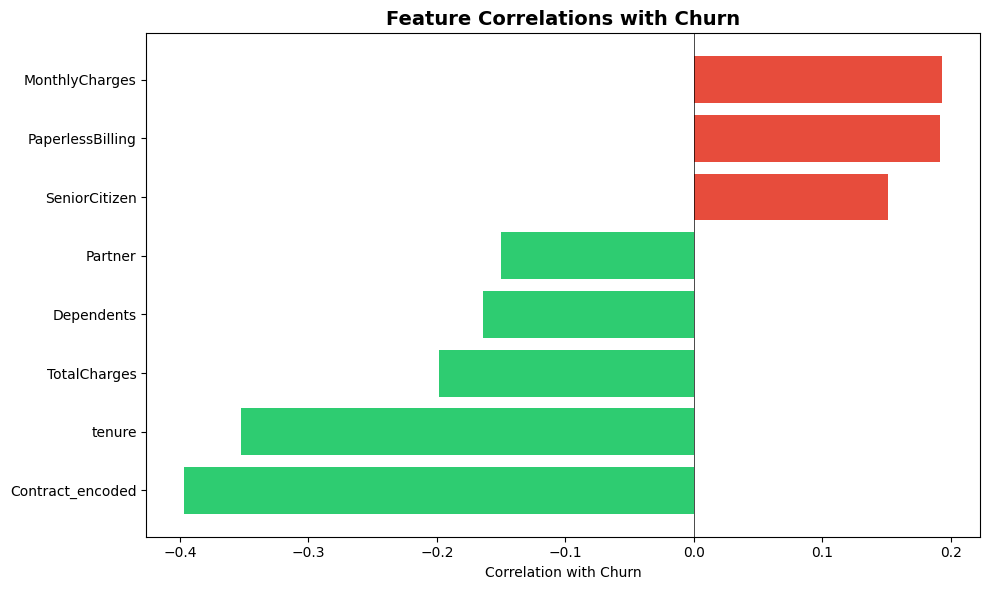


💡 KEY CORRELATIONS:
   🔴 INCREASES churn: Paperless Billing, Senior Citizen, Monthly Charges
   🟢 DECREASES churn: Contract length, Tenure, Partner, Dependents


In [ ]:
# Prepare numeric data
df_numeric = df.copy()
df_numeric['Churn'] = (df_numeric['Churn'] == 'Yes').astype(int)
df_numeric['TotalCharges'] = df_numeric['TotalCharges'].fillna(0)

# Encode categoricals for correlation
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
    df_numeric[col] = (df_numeric[col] == 'Yes').astype(int) if col != 'gender' else (df_numeric[col] == 'Male').astype(int)

# Contract encoding
contract_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df_numeric['Contract_encoded'] = df_numeric['Contract'].map(contract_map)

# Correlation with Churn
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 
                'Partner', 'Dependents', 'PaperlessBilling', 'Contract_encoded']
correlations = df_numeric[numeric_cols + ['Churn']].corr()['Churn'].drop('Churn').sort_values()

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in correlations.values]
bars = ax.barh(correlations.index, correlations.values, color=colors)
ax.set_xlabel('Correlation with Churn')
ax.set_title('Feature Correlations with Churn', fontweight='bold', fontsize=14)
ax.axvline(x=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.savefig('../docs/img/correlations.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 KEY CORRELATIONS:")
print("   🔴 INCREASES churn: Paperless Billing, Senior Citizen, Monthly Charges")
print("   🟢 DECREASES churn: Contract length, Tenure, Partner, Dependents")

In [24]:
print('=' * 60)
print('📊 KEY FINDINGS SUMMARY')
print('=' * 60)

print(f"""
1. OVERALL CHURN
   • Churn Rate: {(df['Churn']=='Yes').mean()*100:.1f}%
   • Total Customers at Risk: {(df['Churn']=='Yes').sum():,}

2. TOP CHURN DRIVERS (Actionable)
   a) CONTRACT TYPE
      • Month-to-month: ~{contract_churn['Month-to-month']:.0f}% churn
      • Action: Offer discounts for annual contracts
   
   b) TENURE
      • New customers (0-12 mo): ~{tenure_churn['0-12']:.0f}% churn
      • Action: Onboarding program, check-ins at 30/60/90 days
   
   c) TECH SUPPORT
      • Without tech support: 2x higher churn
      • Action: Bundle free tech support for first 6 months
   
   d) INTERNET SERVICE
      • Fiber optic: ~{internet_churn['Fiber optic']:.0f}% churn
      • Action: Investigate service quality, set expectations

3. LOW-IMPACT FEATURES
   • Gender: No significant difference
   • Phone service: Minimal impact

4. MODELING CONSIDERATIONS
   • Class imbalance: Use stratified sampling, SMOTE
   • Key features: Contract, Tenure, Services, Charges
   • Evaluation: Use AUC-ROC, Precision-Recall (not just accuracy)
""")

📊 KEY FINDINGS SUMMARY

1. OVERALL CHURN
   • Churn Rate: 26.5%
   • Total Customers at Risk: 1,869

2. TOP CHURN DRIVERS (Actionable)
   a) CONTRACT TYPE
      • Month-to-month: ~43% churn
      • Action: Offer discounts for annual contracts

   b) TENURE
      • New customers (0-12 mo): ~48% churn
      • Action: Onboarding program, check-ins at 30/60/90 days

   c) TECH SUPPORT
      • Without tech support: 2x higher churn
      • Action: Bundle free tech support for first 6 months

   d) INTERNET SERVICE
      • Fiber optic: ~42% churn
      • Action: Investigate service quality, set expectations

3. LOW-IMPACT FEATURES
   • Gender: No significant difference
   • Phone service: Minimal impact

4. MODELING CONSIDERATIONS
   • Class imbalance: Use stratified sampling, SMOTE
   • Key features: Contract, Tenure, Services, Charges
   • Evaluation: Use AUC-ROC, Precision-Recall (not just accuracy)

